# 0. Konfiguration der Arbeitsumgebung
**Hinweis zur Ausführung:**

Bevor Sie mit dem Ausfüllen des Protokolls beginnen, stellt diese Zelle sicher, dass alle notwendigen Software-Bibliotheken installiert und verfügbar sind. Diese sogenannten „Pakete“ (z. B. `ipywidgets` für die interaktiven Eingabefelder) sind erforderlich, damit das Notebook korrekt funktioniert.

**Was in dieser Zelle passiert:**
- Es wird geprüft, ob alle benötigten Pakete bereits in Ihrer Jupyter-Umgebung installiert sind.
- Falls ein Paket fehlt, wird es automatisch installiert.
- Dies funktioniert unabhängig davon, ob Sie mit Anaconda (Windows) oder venv (macOS/Linux) arbeiten.

**Was Sie tun müssen:**
- Führen Sie diese Zelle **einmalig aus**, bevor Sie mit dem Protokoll arbeiten.
- Es ist **keine manuelle Installation** in der Konsole notwendig.
- Falls eine Installation erfolgt, kann es kurz dauern – warten Sie bitte, bis die Zelle vollständig durchgelaufen ist.

**Hinweis:** Falls Sie das Notebook ohne Internetverbindung verwenden, können fehlende Pakete nicht nachgeladen werden.

**Führen Sie jetzt die folgende Zelle aus:** 

In [1]:
import sys
import subprocess

def install(package):
    try:
        print(f"Installiere fehlendes Paket: {package} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        return True
    except subprocess.CalledProcessError as e:
        print(f"Fehler beim Installieren von '{package}':")
        print("→ Überprüfen Sie Ihre Internetverbindung oder Zugriffsrechte.")
        return False
    except Exception as e:
        print(f"Unerwarteter Fehler beim Installieren von '{package}': {e}")
        return False

# Benötigte Pakete
required = {
    "requests": "requests",
    "ipywidgets": "ipywidgets",
    "matplotlib": "matplotlib",
    "numpy": "numpy",
    "jupyterlab_widgets": "jupyterlab_widgets"
}
install_count = 0
failed = []

# Überprüfung & Installation
for import_name, pip_name in required.items():
    try:
        __import__(import_name)
    except ImportError:
        success = install(pip_name)
        if success:
            install_count += 1
        else:
            failed.append(pip_name)

# Zusammenfassung
if failed:
    print("\nEinige Pakete konnten nicht installiert werden:")
    for p in failed:
        print(f"- {p}")
    print("\nBitte versuchen Sie die manuelle Installation in einer Konsole mit:")
    print("    pip install <paketname>")
elif install_count == 0:
    print("Alle benötigten Pakete sind bereits installiert.")
else:
    print("Alle fehlenden Pakete wurden erfolgreich installiert.")

Alle benötigten Pakete sind bereits installiert.


In [2]:
import ipywidgets as widgets
from IPython.display import display
import requests, json, os

# --- Konfiguration ---
VERSUCH = "Wasserstoff als Energieträger"  # ← hier den Versuchsnamen ändern
FILENAME = f"protokoll_{VERSUCH}.json"
FIELD_WIDTH = '500px'
LABEL_WIDTH = '160px'
LOGO_URL = "https://thga.sciebo.de/s/PMFfmxdyEcrEr3P/download"

# --- Felder und Standarddaten ---
fields = {
    "Name": "",
    "Matrikelnummer": "",
    "Gruppe": "",
    "Versuchstag": "",
    "Praktikumsleitung": ""
}

# --- Daten aus Datei laden ---
if os.path.exists(FILENAME):
    with open(FILENAME, "r") as f:
        fields.update(json.load(f))

# --- Logo laden ---
try:
    resp = requests.get(LOGO_URL)
    logo = widgets.Image(
        value=resp.content, format='png',
        layout=widgets.Layout(width='200px', height='auto')
    ) if resp.status_code == 200 else widgets.Label("Logo nicht verfügbar.")
except:
    logo = widgets.Label("Logo konnte nicht geladen werden.")

# --- Überschriftsteil ---
headings = widgets.VBox([
    widgets.HTML(f'<div style="font-size: 20pt; font-weight: bold;">Protokoll zum Versuch: {VERSUCH}</div>'),
    widgets.HTML(f'<div style="font-size: 14pt;"><strong>Praktikum:</strong> Regenerative Energien II</div>'),
    widgets.HTML(f'<div style="font-size: 14pt;"><strong>Semester:</strong> Wintersemester 2025/26</div>')
], layout=widgets.Layout(align_items='flex-start', gap='2px'))

header = widgets.HBox([headings, logo],
                      layout=widgets.Layout(justify_content='space-between', align_items='flex-start'))

# --- Formularfelder anlegen ---
widgets_dict = {
    key: widgets.Text(value=fields[key], layout=widgets.Layout(width=FIELD_WIDTH))
    for key in fields
}

def labeled_row(label, widget):
    return widgets.HBox([
        widgets.Label(label + ":", layout=widgets.Layout(width=LABEL_WIDTH)),
        widget
    ])

form = widgets.VBox([labeled_row(k, widgets_dict[k]) for k in fields])

# --- Speichern ---
def save_to_json(_):
    data = {k: w.value for k, w in widgets_dict.items()}
    with open(FILENAME, "w") as f:
        json.dump(data, f)
    print(f"Daten gespeichert in '{FILENAME}'.")

save_button = widgets.Button(description="Speichern", button_style='success')
save_button.on_click(save_to_json)

# --- Anzeige ---
display(header, widgets.HTML("<hr>"), form, save_button)

HTML(value='<hr>')

Button(button_style='success', description='Speichern', style=ButtonStyle())

 --- 
 # 1. Einleitung

**Hinweis zur Bearbeitung:**  
Bevor Sie mit dem Versuch beginnen, formulieren Sie bitte eine kurze Einleitung. Beschreiben Sie in eigenen Worten die Grundlagen zu Wasserstoff, Energieträgern und dem Wissen, dass benötigt wird, um dieses Protokoll nachvollziehen zu können.


**Denkanstöße für Ihre Einleitung:**
- Wie wird Wasserstoff hergestellt und welche Nomenklatur hat sich dafür etabliert?
- Wofür wird Wasserstoff heutzutage überwiegend verwendet?
- Welche Rolle spielt Wasserstoff als Energieträger in der Energiewende?
- Was ist das Prinzip einer Elektrolyse und einer Brennstoffzelle (mit Bezug auf Wasserstoff)?
- Welche Bedeutung hat die Speicherung erneuerbarer Energien für die Zukunft?
- Wie sehen Verfahren zur Speicherung und Transport von Wasserstoff aus und welche Herausforderungen gibt es diesbezüglich?

**Tragen Sie Ihre eigene Einleitung im folgenden Feld ein:**


---

# Sicherheitshinweise

In diesem Versuch erzeugen und verwenden Sie Wasserstoff und Sauerstoff. Von diesen Gasen gehen Gefahren aus, auf die hier hingewiesen wird. Bitte beachten Sie die H- und P-Sätze, die unten angegeben sind. Sollten Sie Fragen diesbezüglich haben, melden Sie sich jederzeit gerne bei der Praktikumsleitung

### Wasserstoff

<img src="https://www.baua.de/DE/Themen/Chemikalien-Biostoffe/Gefahrstoffe/Einstufung-und-Kennzeichnung/Bilder/Gasflasche.png?__blob=poster&v=1" width="100" height="100" align="center"/> <img src="https://www.baua.de/DE/Themen/Chemikalien-Biostoffe/Gefahrstoffe/Einstufung-und-Kennzeichnung/Bilder/Flamme.png?__blob=poster&v=1" width="100" height="100" align="center"/>

<table align=left>
    <caption alight=top><b>H- und P-Sätze Wasserstoff</b></caption>
    <tr>
        <td>H220</td>
        <td>Extrem entzündbares Gas.</td>
    </tr>
    <tr>
        <td>H280</td>
        <td>Enthält Gas unter Druck; kann bei Erwärmung explodieren.</td>
    </tr>
    <tr>
        <td>P210</td>
        <td>Von Hitze, heißen Oberflächen, Funken, offenen Flammen sowie anderen Zündquellenarten fernhalten. Nicht rauchen.</td>
    </tr>
    <tr>
        <td>P377</td>
        <td>Brand von ausströmendem Gas: Nicht löschen, bis Undichtigkeit gefahrlos beseitigt werden kann.</td>
    </tr>
    <tr>
        <td>P381</td>
        <td>Bei Undichtigkeit alle Zündquellen entfernen.</td>
    </tr>
    <tr>
        <td>P403</td>
        <td>An einem gut belüfteten Ort aufbewahren.</td>
    </tr>
</table>
<br>
<br clear=all>

### Sauerstoff

<img src="https://www.baua.de/DE/Themen/Chemikalien-Biostoffe/Gefahrstoffe/Einstufung-und-Kennzeichnung/Bilder/Gasflasche.png?__blob=poster&v=1" width="100" height="100"/> <img src="https://www.baua.de/DE/Themen/Chemikalien-Biostoffe/Gefahrstoffe/Einstufung-und-Kennzeichnung/Bilder/Flamme-ueber-einem-Kreis.png?__blob=poster&v=1" width="100" height="100"/><br clear=all>


<table align=left>
    <caption alight=top><b>H- und P-Sätze Sauerstoff</b></caption>
    <tr>
        <td>H270</td>
        <td>Extrem entzündbares Gas.</td>
    </tr>
    <tr>
        <td>H280</td>
        <td>Enthält Gas unter Druck; kann bei Erwärmung explodieren.</td>
    </tr>
    <tr>
        <td>P244</td>
        <td>Druckminderer frei von Fett und Öl halten.</td>
    </tr>
    <tr>
        <td>P220</td>
        <td>Von Kleidung und anderen brennbaren Materialien fernhalten</td>
    </tr>
    <tr>
        <td>P370+376</td>
        <td>Bei Brand: Undichtigkeit beseitigen, wenn gefahrlos möglich.</td>
    </tr>
    <tr>
        <td>P403</td>
        <td>An einem gut belüfteten Ort aufbewahren.</td>
    </tr>
</table>
<br clear=all>

---

# 2. Durchführung und Auswertung

### 2.1 Versuch 1: U-I Kennlinie, Faraday und Energiewirkungsgrad eines Elektrolyseurs

Ermitteln Sie die $U-I$-Kennlinie eines Elektrolyseurs und anschließend den Faraday- und Energiewirkungsgrad.

---

**Aufbau, Geräte & Komponenten:**
- Doppelzellen Elektrolyseur  
- Vorratsgefäß mit destilliertem Wasser  
- Power-Modul (4,5 V)  
- Potentiometermodul (100 Ω und 10 Ω)  
- AV-Modul zur Spannungs- und Strommessung  
- Stoppuhr

---

**Schaltplan:**

![Schaltplan Versuch 1](Data/Schaltplan_H2_Versuch_1.png "Versuch 1")

---

**Durchführung**

1.	Bauen Sie den Versuch entsprechend der Versuchsanordnung auf. Stellen Sie das Potentiometermodul auf maximalen Widerstand und füllen Sie die Vorratsgefäße am Elektrolyseur mit destilliertem Wasser. Stellen Sie die Spannung am Power-Modul auf **4,5 V** ein. Bei dem hier verwendeten Elektrolyseur handelt es sich um einen Doppelzellen-Elektrolyseur.
2.	Regeln Sie die Spannung mithilfe des Potentiometer-Moduls in **0,1 V Schritten**. Nutzen Sie dabei zunächst das 100 Ω Potentiometer und anschließend das 10 Ω Potentiometer. Nehmen Sie an jedem Messpunkt die Werte für Spannung $U$ und Stromstärke $I$ auf. Beobachten Sie währenddessen das Verhalten des Elektrolyseurs.
3.	Zur Ermittlung des Faraday- und Energiewirkungsgrades stellen Sie das Potentiometermodul auf einen Widerstand von **5 Ω** ein. Messen Sie, wie lange Sie benötigen, um **10 mL Wasserstoff** herzustellen. Notieren Sie sich dabei auch die Spannung $U$ und Stromstärke $I$.

---

**Messgrößen:**  
- Spannung $U$ in $\text{[V]}$  
- Stromstärke $I$ in $\text{[mA]}$  
- Leistung $P$ in $\text{[mW]}$  
- Zeit $t$ in $\text{[s]}$  
- Faraday-Wirkungsgrad $\eta_\mathrm{F}$
- Energiewirkungsgrad $\eta_\text{E}$ 

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten in `numpy`-Arrays. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im folgenden Beispiel, und zeichnen Sie daraus eine Tabelle:

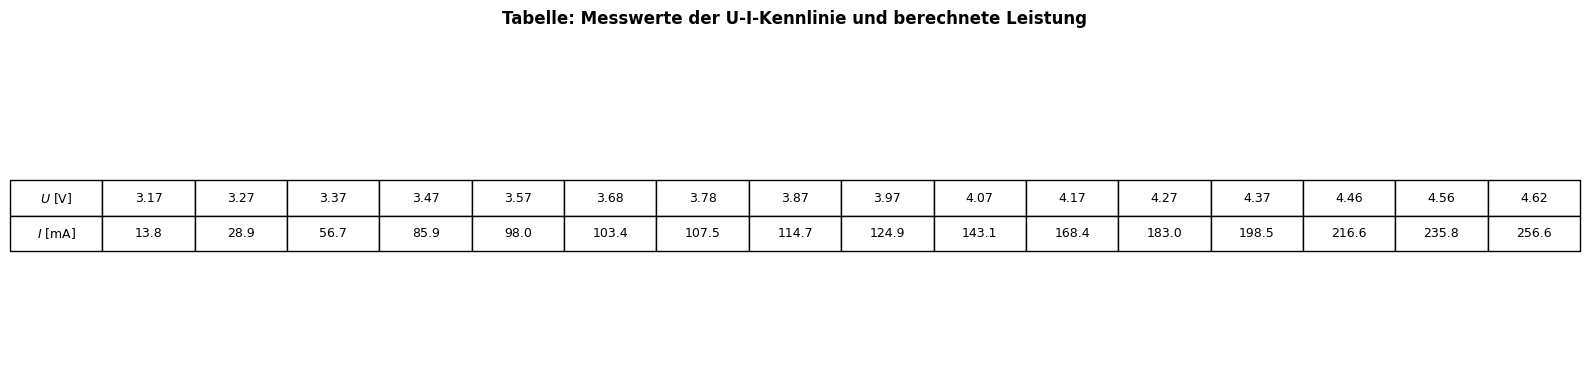

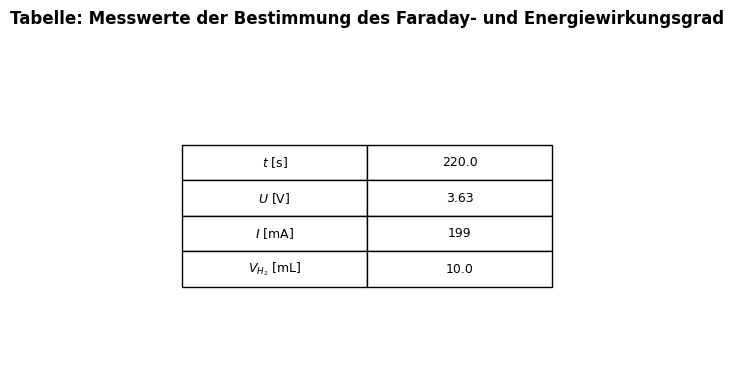

In [3]:
# Beispiel für eine Tablle zu Aufgabe 1:

import numpy as np
import matplotlib.pyplot as plt

# Messwerte für die U-I-Kennlinie
u_1 = np.array([3.17, 3.27, 3.37, 3.47, 3.57, 3.68, 3.78, 3.87, 3.97, 4.07, 4.17, 4.27, 4.37, 4.46, 4.56, 4.62], dtype=float) # in V
i_1 = np.array([13.8, 28.9, 56.7, 85.9, 98.0, 103.4, 107.5, 114.7, 124.9, 143.1, 168.4, 183, 198.5, 216.6, 235.8, 256.6], dtype=float) # in mA

# Messwerte für die Bestimmung des Faraday- und Energiewirkungsgrades
t_1w = np.array([220], dtype=float)
u_1w = np.array([3.63], dtype=float)
i_1w = np.array([199], dtype=float)
v_1w = np.array([10], dtype=float)


#### Erste Tabelle für U-I-Kennlinie
fig, ax = plt.subplots(figsize=(16, 4))
ax.axis("off")

# Erste Zeile: Header mit Zeitwerten
col_labels = ["$U$ [V]"] + [f"{(u)}" for u in u_1]

# Daten-Zeilen vorbereiten
row1 = ["$I$ [mA]"] + [f"{(i)}" for i in i_1]

# Tabelle erstellen
table = ax.table(
    cellText=[row1],
    colLabels=col_labels,
    cellLoc="center",
    loc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

plt.title("Tabelle: Messwerte der U-I-Kennlinie und berechnete Leistung", weight="bold", pad=20)
plt.tight_layout()
plt.show()


#### Zweite Tabelle für Faraday- und Energiewirkungsgrad
fig, ax = plt.subplots(figsize=(4, 4))
ax.axis("off")

# Erste Zeile: Header mit Zeitwerten
col_labels = ["$t$ [s]"] + [f"{(t)}" for t in t_1w]

# Daten-Zeilen vorbereiten
row1 = ["$U$ [V]"] + [f"{(u)}" for u in u_1w]
row2 = ["$I$ [mA]"] + [f"{int(i)}" for i in i_1w]
row3 = ["$V_{H_2}$ [mL]"] + [f"{(v)}" for v in v_1w]

# Tabelle erstellen
table = ax.table(
    cellText=[row1, row2, row3],
    colLabels=col_labels,
    cellLoc="center",
    loc="center",
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

plt.title("Tabelle: Messwerte der Bestimmung des Faraday- und Energiewirkungsgrad", weight="bold", pad=20)
plt.tight_layout()
plt.show()

---

 **Ihre Aufgabe:**
Beschreiben Sie hier **in eigenen Worten**, den Aufbau, die Durchführung und Ihre Beobachtungen
- Welche Startbedingungen gelten für die Messung?
- Wie passiert am Elektrolyseur mit steigender Spannung?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._
---
 **Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

**Auswertung**

1.	Zeichnen Sie die $U-I$-Kennlinie des Elektrolyseurs in ein Diagramm. Beschreiben Sie den Verlauf und begründen Sie diesen. Berechnen Sie die Leistung $P$ des Elektrolyseurs an jedem Messpunkt und zeichnen Sie daraus ein $P-I$-Diagramm. Bestimmen Sie **mathematisch** den Punkt maximaler Leistung durch konstruieren einer Ausgleichsfunktion anhand Ihrer Messdaten.
2.	Berechnen Sie den Faraday- und Energiewirkungsgrad mithilfe nachstehender Formeln. Beachten Sie, dass es sich um einen **Doppelzellenelektrolyseur** handelt, also um 2 aneinandergereihte Einzelzellen. **Achten Sie auf die Einheiten, welche teilweise umgerechnet werden müssen.**

#### Formeln:

Faradaywirkungsgrad: $\eta_\text{F} = \frac{V_{\text{H}_2}}{V_{\text{H}_2,\text{theoretisch}}}$

H$_2$ Volumen, theoretisch: $V_{\text{H}_2,\text{theoretisch}} = \frac{I \cdot t \cdot V_\text{m}}{2 \cdot F}$

Molares Normvolumen (25 °C, 1 bar): $V_\text{m}=24,790 \frac{\text{L}}{\text{mol}}$

Faraday-Konstante: $F = 96485,332 \frac{\text{C}}{\text{mol}}$

Energiewirkungsgrad: $\eta_\text{E} = \frac{H_{\text{s, H}_2}\cdot V_{\text{H}_2}}{U \cdot I \cdot t}$

Brennwert H$_2$ (25 °C, 1 bar):$ H_{\text{s, H}_2} = 11530,239 \frac{\text{kJ}}{\text{m}^3}$

#### 1. Zeichnen Sie die $U-I$-Kennlinie des Elektrolyseurs in ein Diagramm. Beschreiben Sie den Verlauf und begründen Sie diesen. Berechnen Sie die Leistung des Elektrolyseurs an jedem Messpunkt und zeichnen Sie daraus ein -Diagramm. Bestimmen Sie mathematisch den Punkt maximaler Leistung durch konstruieren einer Ausgleichsfunktion anhand Ihrer Messdaten.

In [4]:
# Ihre Lösung hier

*Ihr Text hier*

#### 2. Berechnen Sie den Faraday- und Energiewirkungsgrad mithilfe nachstehender Formeln. Beachten Sie, dass es sich um einen Doppelzellenelektrolyseur handelt, also um 2 aneinandergereihte Einzelzellen. Achten Sie auf die Einheiten, welche teilweise umgerechnet werden müssen.

In [5]:
# Ihre Lösung hier

*Ihr Text hier*

---

### 2.2 Versuch 2: U-I Kennlinie und Wasserstoffverbrauch eines Brennstoffzellen Stacks

Ermitteln Sie die *U-I*-Kennlinie eines Brennstoffzellen-Stacks bestehend aus 13 Einzelzellen.

---

**Aufbau, Geräte & Komponenten:**
- Brennstoffzelle (mit 13 Einzelzellen)
- Hydrostick
- Steuerbox

---

**Durchführung:**

Achten Sie bei der Bedienung der Brennstoffzelle auf den richtigen Ablauf der Schritte in dieser Anleitung.
1. Lüftersteuerung auf „Auto“ und „30 °C“
2. Laststrom auf 1 A, System mit „H2 OPEN“ und „LOAD ON” starten
3. Bei erreichen von 30 °C die Last mit „LOAD OFF“ wieder ausschalten
4. Ohne Last sollte die Brennstoffzelle eine Spannung von ca. 11 V anzeigen
5. Vor dem Start der Messung mit „PURGE“ die Leitungen spülen
6. Stellen Sie die in der Tabelle gezeigten Stromstärke-Werte ein und lesen Sie die Spannung an der Brennstoffzelle ab. Warten Sie nach dem Einstellen einer Stromstärke je ca. 5-15 s, um möglichst reproduzierbare Werte zu erhalten
7. Nach dem Messpunkt mit einer Stromstärke von 800 mA sollte erneut gepurged werden mit „PURGE“
8. Nach dem letzten Messpunkt die Messung über „LOAD OFF“ stoppen
9. Schalten Sie die Brennstoffzelle durch „STOP“ aus

> <table border align=left>
>    <caption><b>Soll-Werte für die Stromstärke <i>I</i></b></caption>
>    <tr>
>        <td><b><i>I</i> [mA]</b></td>
>        <td>0</td>
>        <td>50</td>
>        <td>150</td>
>        <td>200</td>
>        <td>250</td>
>        <td>300</td>
>        <td>400</td>
>        <td>500</td>
>        <td>600</td>
>        <td>800</td>
>        <td>1000</td>
>        <td>1200</td>
>        <td>1400</td>
>        <td>1600</td>
>        <td>1800</td>
>        <td>2000</td>
>    </tr>
></table>
><br clear=all>

---

**Messgrößen:**  
- Ausgangsspannung $U_\text{last}$ in $\text{[V]}$  
- Zellenspannung $U_\text{zelle}$ in $[V]$  
- Stromstärke $I$ in $\text{[mA]}$  
- Sauerstoff und Luftvolumenströme $Q_{\mathrm{O}_2}$ und $Q_{\mathrm{Luft}}$ in $\text{[ml/min]}$  
- Leistung $P$ in $\text{[mW]}$  
- Wirkungsgrad $\eta$ in $\text{[\%]}$

---

**Messdaten**

Notieren Sie hier Ihre Messdaten in `numpy`-Arrays. Nutzen Sie dafür eindeutige Bezeichnungen und zeichnen Sie daraus eine Tabelle:
> Hinweis: Nutzen Sie die Tabelle im Versuchsprotokoll als Grundlage für die Tabelle und nutzen Sie den Code aus den vorherigen Versuchen, um zu einer vollständigen Tabelle zu kommen

In [6]:
# Ihre Daten hier

**Auswertung**

1. Berechnen Sie die Leistungen $P_\text{ist}$ und $P_\text{soll}$, die Volumenströme $Q_{\text{O}_2}$ und $Q_\text{Luft}$ sowie den Wirkungsgrad $\eta$.
2. Zeichnen Sie die gemessene $U-I$-Kennlinie des Brennstoffzellen-Stacks in ein Diagramm und vergleichen Sie den Verlauf mit der $U_\text{soll}-I$-Kennlinie. Beschreiben Sie den Verlauf.
3. Berechnen Sie die Leistung $P_\text{ist}$ und $P_\text{soll}$ des Stacks an jedem Messpunkt und zeichnen Sie die daraus resultierenden $P-I$-Diagramme in ein gemeinsames Diagramm. Diskutieren Sie den Verlauf der Graphen und erläutern Sie, was die Ursache für das Verhalten ist. Bennen Sie die drei unterschiedliche Arbeitsbereiche von Brennstoffzellen und Zeichnen Sie diese in Ihr Diagramm ein.
4. Erläutern Sie den Verlauf des Wirkungsgrades $\eta$ mit steigender Stromstärke $I$. Zeichnen Sie dafür ein $I-\eta$-Diagramm.
5. Was sind die größten Herausforderungen einer zukünftigen „Wasserstoffwirtschaft“? Betrachten Sie besonders die Herstellung, Transportwege und -möglichkeiten. In welcher Form kann Wasserstoff effizient über große Distanzen transportiert werden? Wieso eignet sich der Transport von gasförmigem H_$2$ dafür nicht?

#### Formeln:

Energiewirkungsgrad: $\eta = \frac{P_\text{ist}}{P_\text{ist}}$

Reaktionsgleichung: $ 2 ~ \text{H}_2 + \text{O}_2 \rightarrow 2 ~ \text{H}_2\text{O}$

Für die Berechnung der Volumenströme an Sauerstoff $Q_{\text{O}_2}$ und Luft $Q_\text{Luft}$ beachten Sie die Stöchiometrie der Reaktion innerhalb der Brennstoffzelle. Außerdem gilt, dass alle Gase bei niedrigen Drücken ein nahezu konstantes molares Volumen haben (siehe auch Versuch 1). Nutzen Sie diese Näherung zur Berechnung. Rechnen Sie mit einem Sauerstoffgehalt der Luft von 20,94%.

#### 1. Berechnen Sie die Leistungen $P_\text{ist}$ und $P_\text{soll}$, die Volumenströme $Q_{\text{O}_2}$ und $Q_\text{Luft}$ sowie den Wirkungsgrad $\eta$.

In [7]:
# Ihre Lösung hier

#### 2. Zeichnen Sie die gemessene $U-I$-Kennlinie des Brennstoffzellen-Stacks in ein Diagramm und vergleichen Sie den Verlauf mit der $U_\text{soll}-I$-Kennlinie. Beschreiben Sie den Verlauf.

In [8]:
# Ihre Lösung hier

*Ihr Text hier*

#### 3. Berechnen Sie die Leistung $P_\text{ist}$ und $P_\text{soll}$ des Stacks an jedem Messpunkt und zeichnen Sie die daraus resultierenden $P-I$-Diagramme in ein gemeinsames Diagramm. Diskutieren Sie den Verlauf der Graphen und erläutern Sie, was die Ursache für das Verhalten ist. Bennen Sie die drei unterschiedliche Arbeitsbereiche von Brennstoffzellen und Zeichnen Sie diese in Ihr Diagramm ein.

In [9]:
# Ihre Lösung hier

*Ihr Text hier*

#### 4. Erläutern Sie den Verlauf des Wirkungsgrades $\eta$ mit steigender Stromstärke $I$. Zeichnen Sie dafür ein $I-\eta$-Diagramm.

In [10]:
# Ihre Lösung hier

*Ihr Text hier*

#### 5. Was sind die größten Herausforderungen einer zukünftigen „Wasserstoffwirtschaft“? Betrachten Sie besonders die Herstellung, Transportwege und -möglichkeiten. In welcher Form kann Wasserstoff effizient über große Distanzen transportiert werden? Wieso eignet sich der Transport von gasförmigem H_$2$ dafür nicht?

*Ihr Text hier*

---

# 3. Quellen